## ML and Bayesian Inference
### Weber, POL 683

## Model Fit in Logit Models

Model fit is an important, though difficult, topic when we are dealing with non-linear models. Though we can derive scalar measures of model fit from the linear model, which generally describe the discrepancy between the observed and predicted data (e.g., $R^2$), it's hard to find a comparably reliable statistic for non-linear models. 

Typically, we use $R^2$ to diagnose model fit, where the statistic is between 0 and 1. But with dichotomous data, it is never really clear what the boundary will be. It also doesn't have a natural intepretation. Recall, the statistic measures the amount of variance shared between the linear composition and the dependent variable -- it's the ratio of the regression variance to the total variance. We can calculate the total variance, but the regression variance is more challenging because we never observe $y_{latent}$ directly.

Why this occurs should be fairly intuitive. Because we need to theoretically separate the structural and measurement models, it is difficult to derive a measure that is based on the distance between the observed and the predicted data. For instance, $exp(b)$, the odds ratio in a logit regression, makes it difficult to then map the log odds onto the 0/1 realization of the latent variable. 

In this session, we'll consider measures of model fit when using maximum likelihood. These are general measures of fit that translate to a variety of models (as long as ML is used). In addition to scalar measures of fit, we'll review model comparisons and "information measures" which may be used to compare non-nested models. Finally, we'll consider several approaches uniquely tailored to the binary variable regression; in particular, pseudo-$R^2$,  "counts correctly predicted," and "counts predicted, corrected by chance," and how to summarize prediction uncertainty.

### Counts correctly predicted

We could come up with a matrix which is the predicted value of $Y_{obs}$ and the actual value of $Y$. In this 2x2 matrix, the 1,1 and 0,0 entries represent accurate predictions; the off-diagonals are inaccurate predictions. We could just generate our prediction by whether the predicted latent variable is positive ($y=1$) or negative ($y=0$). Then, calculate the "percent correctly predicted."

If we convert these to probabilities by using the inverse normal or logit ($\texttt{pnorm}$ or $\texttt{logit}$), then define the $\texttt{ePCP}$, expected correctly predicted as:

$$ePCP={1\over n}({\sum_{y=1} P_i+\sum_{y=0}(1-P_i)})$$

An issue with "Percent Correctly Predicted" is that certainty is a constant. We declare $Y=1$ if $p=0.55$, just as we would declare $Y=1$ if $p=0.99$, but are clearly more confident in the latter. Thus, we weight each prediction by its constituent probability. We are accounting for our uncertainty. Typically, this number is somewhat lower than PCP. 

Another variation: Let's assume two models, a naive model and a model with the expected predictor. The naive model predicts the outcome based on the modal category. Thus, if 51\% voted for Trump, the model would predict an Trump vote with probability of 0.51. We should never really get less than 0.51 -- if we do, then the naive model would be a superior model. 

In reality, our naive estimate is 0.65

Think of it this way -- if we were to just estimate $\theta$, that value would be the same as $\texttt{plogis(a)}$ from a regression model with no predictors. The naive model is one that just assumes a single underlying $\theta$, instead of $\theta$ being some linear composite of predictors. Then, we may construct a comparison,

$$PRE={{PCP-PMC}\over {1-PMC}}$$

Where the PRE is simply the proportional reduction in error -- how much do we reduce the error with our model, compared to the naive model which only predicts the modal category?

### The Likelihood Ratio Test

These are useful summary measures of model fit; they simply represent a comparison between our predicted and observed data, but in the case of binary responses. Often, we are also interested in comparing coefficients and/or estimating whether a coefficient or set of coefficients are equal to zero.

Say we have this model:

How do we test $H_0: \beta_{1}=\beta_{2}=0$? Similar to the joint F-test in the linear model, we can define a likelihood ratio test when we use MLE. Define two models: (1) $M_0: a $ and (2) $M_1: a+b_1x_x+b_2 x_2$

Let's estimate the second model by maximizing the log likelihood function ($loglik_{m1}$) and then estimate a second model where we constrain the two slopes to be 0. Then,

$$G^2(M_0|M_1)=2 loglik_{m1}-2 loglik_{m0}$$

The $G^2$ statistic is distributed $\chi^2$ with $df=$number of constraints (here 2). Clearly, we can reject the null of no influence. See Long (1997, page 94)

We could flip things, and instead of comparing our model to one with no predictors, we could compare our model to one with predictors equal to the number of data points. In this case, we would perfectly predict our data, so the likelihood becomes 1. The log of 1 is 0. If we craft the same comparison

$$G^2=2 loglik_{Full}-2 loglik_{M_1}$$, 

this reduces to 

$$Deviance=-2 loglik_{M_1}$$, 

This is called the deviance. It is just two times the log likelihood. It's also reported at the bottom of the $\texttt{glm}$ output

In particular, the $\texttt{Null Deviance}$ is

$$Null,Deviance=2loglik_{full}-2log_lik{Null}$$

The $\texttt{Residual Deviance}$

$$Residual,Deviance=2loglik_{full}-2loglik_{My Model}$$


### The Wald Test
The Wald Test is asymptotically equal to the LR test, and the logic isn't all that different. First, constuct a Q and R vector of constants, such that 

$$Qb=r$$

Let's assume one variable, so we estimate a slope and an intercept. Our $b$ vector is length 2.

Let's test the constraint that $b=0$, then declare $Q=(0,1)$ and $r=0$. The Wald statistic is

$$W=(Qb-r)^T(Qvar(b)Q^T)^{-1}(Qb-r)$$

Let's deconstruct the statistic. The left and rightmost portions estimate the distance between the actual value of $b$ and 0 -- regardless of the complexity, it's the freed model relative to the constrained model. Because there is uncertainty around the estimates, this is represented in the middle portion. Again, we multiple by Q because we are only concerned about $b$. Take the inverse because we want to give more weight to precise (smaller variance) estimates (Long 1997, 90).

In R we could use the aod package. The first argument is $b$, the second is the variance-covariance matrix, the third is the terms that we want to constrain. More complex constraints could also be specified.

### Warning
The Wald and LR tests are reasonable approaches, but (1) their small sample properties are somewhat unknown, and ****(2) they should only be used if the null model consists of the same data***. Say you estimate a regression of $y$ on $x$ where $x$ is missing several observations. \texttt{R} will automatically drop these observations. Our null model must only include values of $y$ in which $x$ is observed, otherwise, it's an invalid comparison. I specified this above by declaring a dataset in which all NAs were omitted, $\texttt{na.omit(data)}$. Be careful when you conduct these tests that your null model only includes points where the X variables are observed (even though the Xs aren't included in the model)!

Moreover, these methods can really only be used for nested model. In the case above, $b=0$ is a constraint, so the restricted/constrained model is nested in the unrestricted model. In other words, the data are the same and the models are nested. If we wish to compare non-nested models, it's advisable to use the "information measures" described below.

### Single Point Estimates of Fit
"Scalar estimates" of model fit are not incredibly meaningful in the logit/probit framework. Yet, since they are often presented, I'll introduce them here. Recall, the $R^2$ measure is just

$$R^2={RegSS\over TSS}=1-{RSS/TSS}$$

The problem is that in the logit/probit model, we cannot directly compare $Y_{obs}$ to the prediction we make with respect to $Y_{latent}$. Nonetheless, let's define the Efron (1978) measure of pseudo-$R^2$ as,

$$PseudoR^2={1-{\sum (y-\hat{y_{latent}})^2}\over {\sum (y-\bar{y})^2)}}$$

Thus, in the denominator we are subtracting the latent prediction from the 0/1 observed value. 

Or, McFadden (1973) takes the ratio of the log likelihood of the model without predictors relative to the log likelihood of the model with predictors. Subtract this ratio from 1.

Notice that the point predictions are somewhat different. The Long (1997) book (p. 104-105) highlights several additional ones, which I encourage you to program yourselves, but typically the problem still remains: The fact that our predictions and the observed data are on different metrics, makes any comparison somewhat tenuous. Instead, a better approach is to use the aformentioned count predictions.

### Information Measures
The Akaike Information Criterion (AIC) is defined as:

$$AIC={{-2loglik(\theta)+2P}\over N}$$

Calculate the $-2loglik$ and add 2 $\times$ the number of predictors, where $p=K+1$ (Long 1997, 109). Finally, divide by the number of observations. Notice what happens with this function. As the number of parameters increases, but the log-likelihood stays the same, the AIC will increase. We prefer a \emph{smaller} AIC. The statistic penalizes for added parameters that do not improve fit. We will always decrease the log-likelihood by adding more parameters. Unlike the LR test, we could compare different non-nested models or models across samples. We just calculate the difference between two models -- call the first $AIC_1$ and the second $AIC_2$. There's not really an agreed upon cutoff as to what this difference should be, to determine whether one model fits better. I generally follow the rule that if it greater than 10, it's probably worthwhile to accept the more complex model.

The Bayesian Information Criterion (BIC) is again based on a comparision -- between a fully saturated model and the proposed model. The BIC is:

$$BIC=D(M)-df ln N$$

Here, $D(M)$ is simply the deviance for the model -- again the contrast between the proposed model and the fully saturated model. The degrees of freedom calculation is $N-k-1$, where $k$ is the number of predictors. Note what happens with this statistic. If the deviance increases, this indicates a worse fitting model; we prefer a smaller number. But the deviance is again offset by the number of parameters, the degrees of freedom. Again, we should always prefer the model with smaller BIC.

### Simulation Methods
Gelman and Hill (2009) elaborate on one of unfortunate aspects of statistical methods: It is inappropriately viewed as a data reduction technique. We obtain a rich dataset and then reduce it to a single (oftentimes uninterpretable) estimate. In fact, the estimate itself is subject to sampling error -- insofar as we only observe a sample and not the population. Unfortunately, the critique also applies to estimates of model fit. If there is uncertainty in our estimates, then there is also uncertainty in how well our model fit the data.

We can use simulation based methods to better draw inferences from our model, as well as diagnose how reasonably our model fit our data. Here, I'll draw heavily on Gelman and Hill (2009, Chapter 7). 

### Simulating Prediction Uncertainty
In the last session, I provided a little bit of guidance about how to simulate uncertainty in logit/probit regression. I want to return to that here, for a more complete treatment. 

There are a number of measures of fit. Unique to the logit/probit model is the suite of "percent correctly predicted" measures, which use the model parameters and data to predict 1/0 responses. These predictions are then compared to the actual data. 

Alternatively, we can make use of the calculated log-likelihood value, not only for model comparisons, but also to generate scalar measures of fit, such as the pseudo-$R^2$. However, these scalar measures are somewhat problematic, as they assume a comparison that doesn't exist, between the the latent and observed data. Alternatively, we can use "information based" measures, such as the AIC and BIC, to compare model fit across non-nested models. These statistics not only use the log-likelihood, but they also penalize for the number of parameters.

These measures -- and the model -- all suffer from the flaw of being somewhat reductive. We as researchers too often use our model to make predictions, as if there were complete certainty in the parameter estimates. There is not, and the parameter estimates like the sample, follow a distribution of potential responses. Thus, I encourage you to think carefully about simulation based methods of fit, consistent with the last section of these notes.

In [83]:
library(dplyr)
library(survey)  
library(mice) 
library(reshape2)
rm(list=ls())
load("~/Desktop/APL Survey/demo683.rda")
ls()
head(demo_data)


[1] "demo_data"

trump_vote,pid,dem_ideo,rep_ideo
0,1,3,4
1,4,2,4
1,6,3,3
0,2,3,4
1,4,3,4
1,6,1,1


In [85]:
head(demo_data)
model<-glm(trump_vote~pid, data=demo_data, family=binomial("logit"))
summary(model)


exp(model$coefficients) ### For every unit increase in pid, there is a 2.94 change in the odds for voting Trump, or


print("Pr(Trump|PID=1)")
predict(model, newdata=data.frame(pid=1)) %>% plogis()
print("Pr(Not Trump|PID=1)")
1-predict(model, newdata=data.frame(pid=1)) %>% plogis()

print("Pr(Trump|PID=2)")
predict(model, newdata=data.frame(pid=2)) %>% plogis()
print("Pr(Not Trump|PID=2)")
1-predict(model, newdata=data.frame(pid=2)) %>% plogis()

#odds(y=1|dem=2)/
#odds(y=1|dem=1)



## Just the ratio
(predict(model, newdata=data.frame(pid=2)) %>% plogis()/(1-predict(model, newdata=data.frame(pid=2)) %>% plogis()))/
(predict(model, newdata=data.frame(pid=1)) %>% plogis()/(1-predict(model, newdata=data.frame(pid=1)) %>% plogis()))

## Same it's somehwere else
(predict(model, newdata=data.frame(pid=4)) %>% plogis()/(1-predict(model, newdata=data.frame(pid=4)) %>% plogis()))/
(predict(model, newdata=data.frame(pid=3)) %>% plogis()/(1-predict(model, newdata=data.frame(pid=3)) %>% plogis()))



trump_vote,pid,dem_ideo,rep_ideo
0,1,3,4
1,4,2,4
1,6,3,3
0,2,3,4
1,4,3,4
1,6,1,1



Call:
glm(formula = trump_vote ~ pid, family = binomial("logit"), data = demo_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4218  -0.6527  -0.2326   0.5534   2.6919  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.67498    0.27384  -17.07   <2e-16 ***
pid          1.07896    0.05987   18.02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1585.1  on 1143  degrees of freedom
Residual deviance:  936.6  on 1142  degrees of freedom
AIC: 940.6

Number of Fisher Scoring iterations: 5


(Intercept)         pid 
 0.00932575  2.94161326

[1] "Pr(Trump|PID=1)"


1 
0.02670029

[1] "Pr(Not Trump|PID=1)"


1 
0.9732997

[1] "Pr(Trump|PID=2)"


1 
0.07467086

[1] "Pr(Not Trump|PID=2)"


1 
0.9253291

1 
2.941613

1 
2.941613

In [87]:
library(pscl)
library(lmtest)
data<-na.omit(demo_data)
m1<-glm(trump_vote~1, data=data, family=binomial("logit")) #naive model
hitmiss(m1)

m2<-glm(trump_vote~pid, data=data, family=binomial("logit"))
hitmiss(m2)
lrtest(m1,m2)

Classification Threshold = 0.5 
       y=0 y=1
yhat=0 587 557
yhat=1   0   0
Percent Correctly Predicted = 51.31%
Percent Correctly Predicted = 100%, for y = 0
Percent Correctly Predicted = 0%  for y = 1
Null Model Correctly Predicts 51.31%


[1]  51.31119 100.00000   0.00000

Classification Threshold = 0.5 
       y=0 y=1
yhat=0 513 126
yhat=1  74 431
Percent Correctly Predicted = 82.52%
Percent Correctly Predicted = 87.39%, for y = 0
Percent Correctly Predicted = 77.38%  for y = 1
Null Model Correctly Predicts 51.31%


[1] 82.51748 87.39353 77.37882

#Df,LogLik,Df,Chisq,Pr(>Chisq)
1,-792.5670,NA,NA,NA
2,-468.2992,1,648.5356,4.651497e-143


In [88]:
efron.r2=function(x){
  fit.x<-x$fitted.values
  obs.x<-x$y
  return((sum((obs.x-fit.x)^2))/(sum((obs.x-mean(obs.x))^2)))
}
efron.r2(m2)

mcfadden.r2=function(a,b){
  return(1-logLik(a)/logLik(b))
}
mcfadden.r2(m2,m1)

[1] 0.5169841

'log Lik.' 0.4091361 (df=2)

Let's now simulate predictions at several values of $x$

0.02670029
0.07467086
0.19183953
0.41116698
0.67256626
0.85799952
0.94673457


(Intercept),pid
-4.819838,1.104199
-4.750067,1.080433
-4.445323,1.046627
-4.405278,1.041774
-4.705527,1.061336
-4.780982,1.141289


[1] 1000    2

ERROR: Error in data.frame(lower_bound, upper_bound, median, pid = seq(1, 7, : arguments imply differing number of rows: 1000, 7


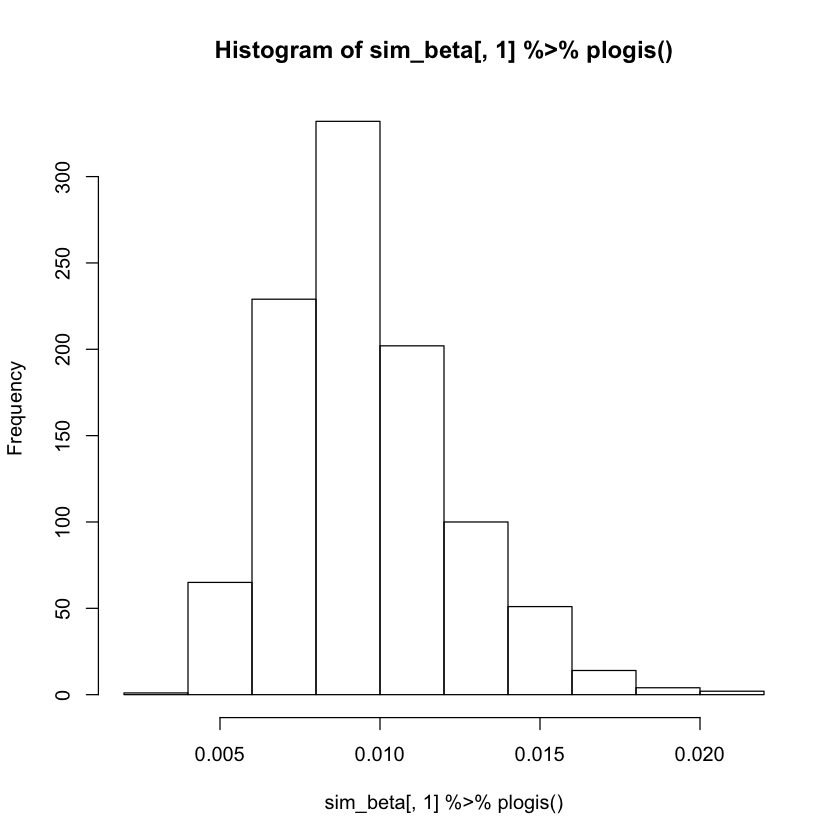

In [96]:
library(ggplot2)

nd<-cbind(1, seq(1, 7, by=1))

plogis(nd %*% coef(m2))

library(MASS)
sim_beta<-mvrnorm(1000, coef(m2), vcov(m2))

hist(sim_beta[,1] %>% plogis())

head(sim_beta)
dim(sim_beta)

lower_bound=nd %*% t(sim_beta) %>% t() %>% plogis() %>% apply(2, quantile, 0.025)
upper_bound=nd %*% t(sim_beta) %>% t() %>% plogis() %>% apply(2, quantile, 0.975)
median=nd %*% t(sim_beta) %>% t() %>% plogis() %>% apply(2, quantile, 0.5)
plot.dat<-data.frame(lower_bound, upper_bound, median, pid=seq(1,7, 1))
plot.dat
ggplot(plot.dat, aes(x=pid, 
                     y=median, 
                     ymax=upper_bound, 
                     ymin=lower_bound, group=1))+
geom_line()+
geom_ribbon(fill="pink", alpha=0.75)+
xlab("PID")+
ylab("Prob")

In [21]:
library('rstanarm')
data1<-na.omit(subset(data, select=c("trump_vote", "pid")))
# https://cran.r-project.org/web/packages/rstanarm/vignettes/rstanarm.html
# Caution: Think carefully about priors! 
mod <- stan_glm(trump_vote ~ 1 +  pid,
                              data = data1,
                              family = binomial(link = "logit"))
                              


SAMPLING FOR MODEL 'bernoulli' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.4 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.165974 seconds (Warm-up)
Chain 1:                0.168055 seconds (Sampling)
Chain 1:                0.

[1] 4000    2

(Intercept),pid
-5.310674,1.213412
-4.735571,1.096279
-4.716306,1.103953
-4.703022,1.073294
-4.640794,1.080176
-4.508793,1.030399


[1] 0.02709044

[1] 0.9463014

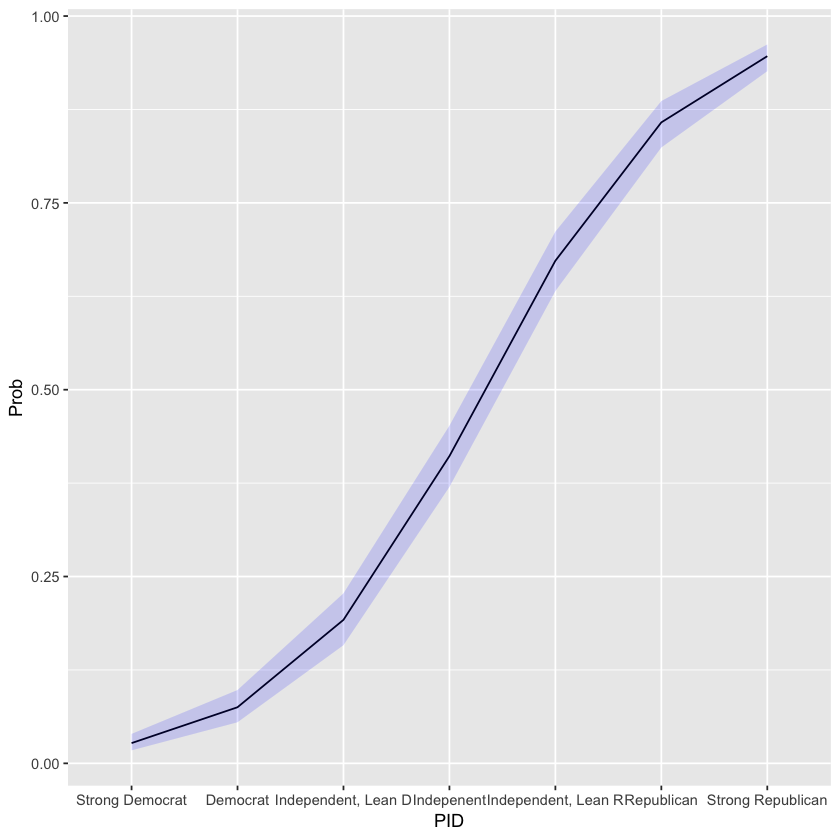

In [70]:
library(bayesplot)
library(ggplot2)

posterior <- as.matrix(mod)
dim(posterior)
head(posterior)
posterior %*% c(1,1) %>% plogis() %>% mean()
posterior %*% c(1,7) %>% plogis() %>% mean()
temp_data<-cbind(1,seq(1,7))

mean=(posterior %*% t(temp_data) %>% plogis() %>% apply(2, mean))
lower=(posterior %*% t(temp_data) %>% plogis() %>% apply(2, quantile, 0.025))
upper=(posterior %*% t(temp_data) %>% plogis() %>% apply(2, quantile, 0.975))

plot.data<-data.frame(mean, upper, lower, pid=c("Strong Democrat", "Democrat", "Independent, Lean D",
                                    "Indepenent", "Independent, Lean R", "Republican", "Strong Republican"))
plot.data$pid<-factor(plot.data$pid, c("Strong Democrat", "Democrat", "Independent, Lean D",
                                    "Indepenent", "Independent, Lean R", "Republican", "Strong Republican"))

ggplot(plot.data, aes(x=as.factor(pid), 
                     y=mean, 
                     ymax=upper, 
                     ymin=lower, group=1))+
geom_line()+
geom_ribbon(fill="blue", alpha=0.15)+
xlab("PID")+
ylab("Prob")
